In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
! pip install -q kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-02 21:56:08          15036       1199  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9117        668  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4057        285  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! kaggle competitions download -c 'sf-crime'

sf-crime.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip sf-crime.zip

Archive:  sf-crime.zip
replace sampleSubmission.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
! unzip train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
tr_data=pd.read_csv('train.csv')

In [ ]:
tr_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


San Francisco Crimes

Category		Number of occurences
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      22

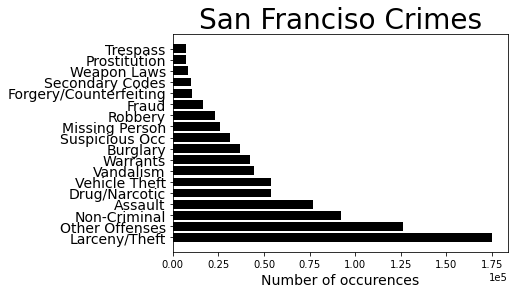

In [ ]:
crimes_rating = tr_data['Category'].value_counts()
y_pos = np.arange(len(crimes_rating[0:18].keys()))

plt.barh(y_pos, crimes_rating[0:18].to_numpy(),  align='center', alpha=1, color = 'black')

plt.yticks(y_pos, map(lambda x:x.title(),crimes_rating[0:18].keys()), fontsize = 14)
plt.xlabel('Number of occurences', fontsize = 14)
plt.title('San Franciso Crimes', fontsize = 28)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

print ('San Francisco Crimes\n')
print ('Category\t\tNumber of occurences') 
print (crimes_rating)

In [ ]:
tr_data['Dates']=pd.to_datetime(tr_data["Dates"])
tr_data['Year']=tr_data['Dates'].dt.year
tr_data['Month']=tr_data['Dates'].dt.month
tr_data['Hour']=tr_data['Dates'].dt.hour
month_map={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
tr_data['Month'].replace(month_map, inplace=True)
tr_data['Year']=tr_data['Year'].astype(str)
tr_data['Hour']=tr_data['Hour'].astype(str)

In [ ]:
tr_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,May,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,May,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,May,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,May,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,May,23


In [ ]:
YearlyData = pd.DataFrame(tr_data["Year"].value_counts())
MonthlyData = pd.DataFrame(tr_data["Month"].value_counts())
WeeklyData = pd.DataFrame(tr_data["DayOfWeek"].value_counts(sort=False))
HourlyData = pd.DataFrame(tr_data["Hour"].value_counts())
DistrictData = pd.DataFrame(tr_data["PdDistrict"].value_counts())

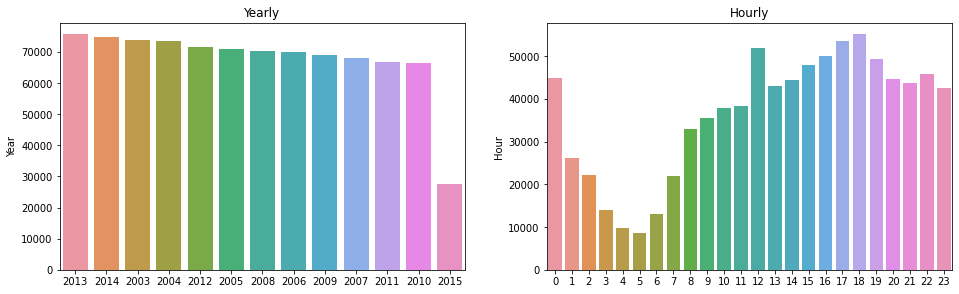

In [ ]:
plt.figure(figsize=(16,10))
ax2 =  plt.subplot2grid((2,2),(0,1))
ax2.set_title('Hourly')
sns.barplot(x=HourlyData.index, y="Hour", data=HourlyData, order=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
ax4 =  plt.subplot2grid((2,2),(0,0))
ax4.set_title('Yearly')
sns.barplot(x=YearlyData.index, y="Year", data=YearlyData)

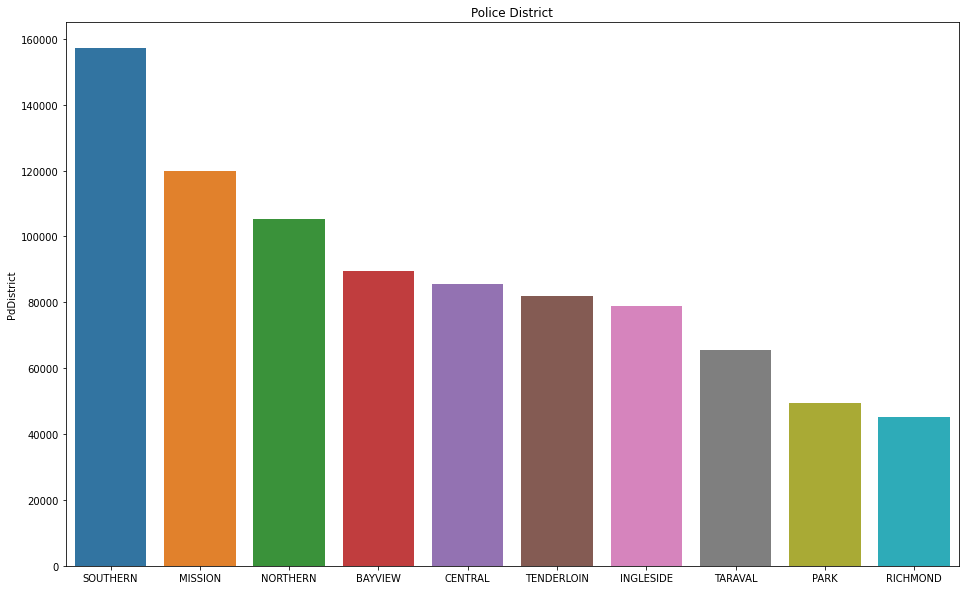

In [ ]:
plt.figure(figsize=(16,10))
ax1 =  plt.subplot2grid((1,1),(0,0))
ax1.set_title('Police District')
sns.barplot(x=DistrictData.index, y="PdDistrict", data=DistrictData)

In [ ]:
tmp=pd.DataFrame(tr_data.groupby(['Year','Month','DayOfWeek','Hour','PdDistrict']).size(), columns=['count'])
tmp.reset_index(inplace=True)

In [ ]:
tmp.head()

,Year,Month,DayOfWeek,Hour,PdDistrict,count
0,2003,Apr,Friday,0,BAYVIEW,3
1,2003,Apr,Friday,0,CENTRAL,4
2,2003,Apr,Friday,0,INGLESIDE,2
3,2003,Apr,Friday,0,MISSION,7
4,2003,Apr,Friday,0,NORTHERN,3


[Text(0, 0, 'EMBEZZLEMENT'),
 Text(0, 0, 'SUICIDE'),
 Text(0, 0, 'FAMILY OFFENSES'),
 Text(0, 0, 'BAD CHECKS'),
 Text(0, 0, 'BRIBERY'),
 Text(0, 0, 'EXTORTION'),
 Text(0, 0, 'SEX OFFENSES NON FORCIBLE'),
 Text(0, 0, 'GAMBLING'),
 Text(0, 0, 'PORNOGRAPHY/OBSCENE MAT'),
 Text(0, 0, 'TREA')]

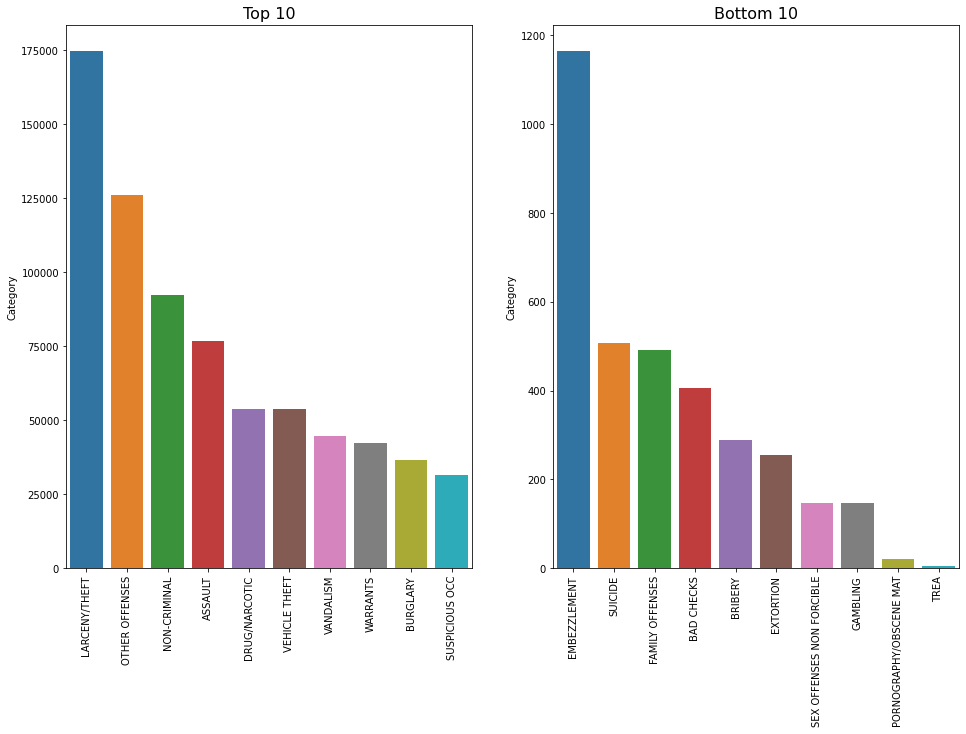

In [ ]:
df_cr=pd.DataFrame(tr_data['Category'].value_counts())
plt.figure(figsize=(16,10))
ax1 =  plt.subplot2grid((1,2),(0,0))
ax1.set_title('Top 10', size=16)
sns.barplot(x=df_cr.head(10).index, y='Category', data=df_cr.head(10))
ax1.set_xticklabels(ax1.xaxis.get_ticklabels(), rotation=90)
ax2 =  plt.subplot2grid((1,2),(0,1))
ax2.set_title('Bottom 10', size=16)
sns.barplot(x=df_cr.tail(10).index, y='Category', data=df_cr.tail(10))
ax2.set_xticklabels(ax2.xaxis.get_ticklabels(), rotation=90)

In [ ]:
top10cc=pd.Series(df_cr.head(10).index)
top10=tr_data[tr_data['Category'].isin(top10cc)]

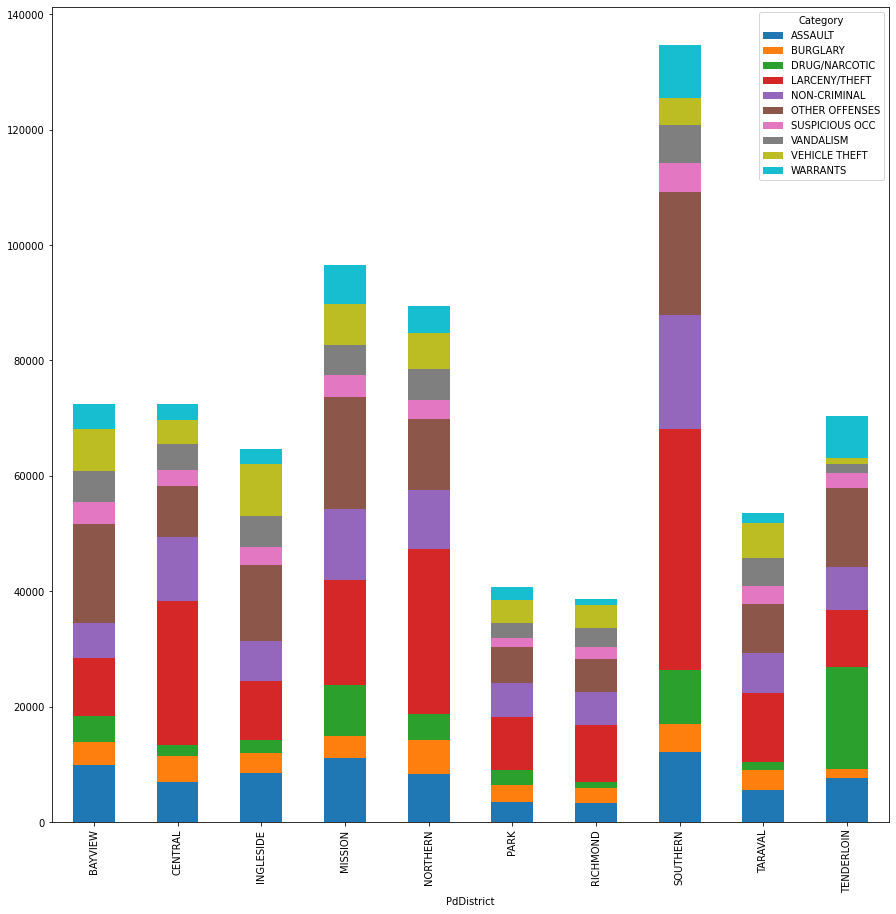

In [ ]:
tmp=pd.DataFrame(top10.groupby(['PdDistrict','Category']).size(), columns=['count'])
tmp.reset_index(inplace=True)
tmp=tmp.pivot(index='PdDistrict',columns='Category',values='count')
fig, axes = plt.subplots(1,1,figsize=(15,15))
tmp.plot(ax=axes,kind='bar', stacked=True)

In [ ]:
tr_data['Hour'] = l1.fit_transform(tr_data['Hour'])
tr_data['Year'] = l1.fit_transform(tr_data['Year'])

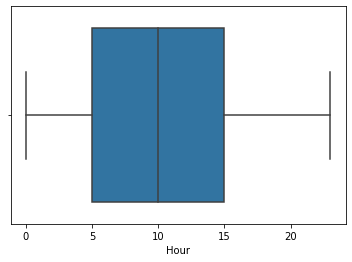

In [ ]:
sns.boxplot(data=tr_data, x='Hour') #no outliers

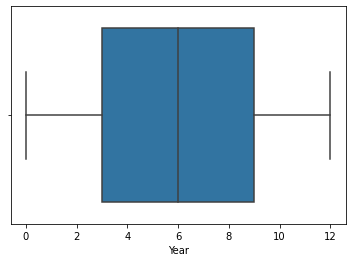

In [ ]:
sns.boxplot(data=tr_data, x='Year') #no outliers

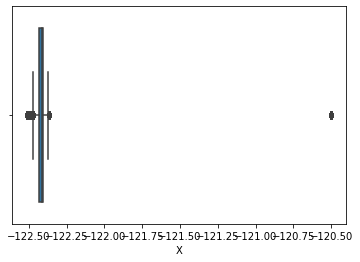

In [ ]:
sns.boxplot(data=tr_data, x='X')

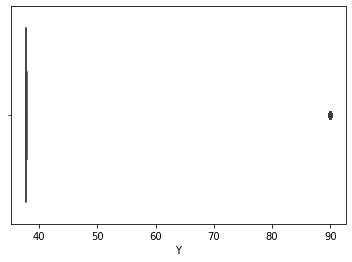

In [ ]:
sns.boxplot(data=tr_data, x='Y')

In [ ]:
#function for outliers
def fix_outliers(df_, colName):
  q1 = df_[colName].quantile(0.25)
  q3 = df_[colName].quantile(0.75)
  range = q3-q1
  whisker_upper = q3+1.5*range
  whisker_lower = q1-1.5*range
  df_[colName] = np.where(df_[colName]>whisker_upper, whisker_upper, np.where(df_[colName]<whisker_lower, whisker_lower, df_[colName]))
  return df_

tr_data= fix_outliers(tr_data, 'X')
tr_data= fix_outliers(tr_data, 'Y')

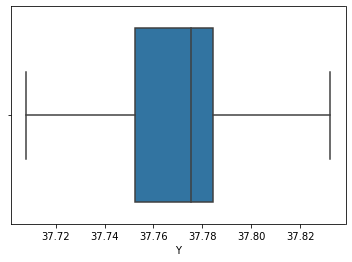

In [ ]:
sns.boxplot(data=tr_data, x='Y') #outliers fixed

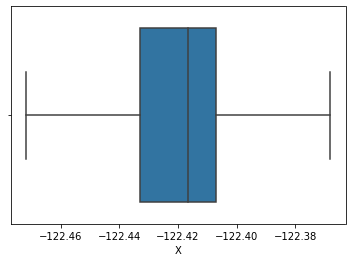

In [ ]:
sns.boxplot(data=tr_data, x='X') #outliers fixed

In [ ]:
tr_data.dtypes

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
Year                   int64
Month                 object
Hour                   int64
dtype: object

In [ ]:
tr_data.shape

(878049, 12)

In [ ]:
tr_data.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Hour
count,878049,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000,878049.000000,878049,878049.000000
unique,389257,39,879,7,10,17,23228,NaN,NaN,NaN,12,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN,NaN,Oct,NaN
freq,185,174900,60022,133734,157182,526790,26533,NaN,NaN,NaN,80274,NaN
first,2003-01-06 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-05-13 23:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.421705,37.767040,5.712046,NaN,10.129348
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022544,0.024170,3.631194,NaN,6.393686
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.471941,37.707879,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427,3.000000,NaN,5.000000


In [ ]:
#dropping useless features
tr_data.drop('Descript', inplace=True, axis=1)
tr_data.drop('Resolution', inplace=True, axis=1)
tr_data.drop('Dates', inplace=True, axis=1)
tr_data.drop('Address', inplace=True, axis=1)

In [ ]:
tr_data.head()

,Category,DayOfWeek,PdDistrict,X,Y,Year,Month,Hour
0,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,12,May,16
1,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599,12,May,16
2,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414,12,May,16
3,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,12,May,16
4,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,12,May,16


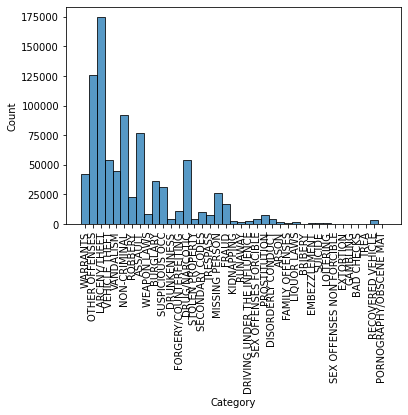

In [ ]:
chart = sns.histplot(data=tr_data, x='Category', palette="Set1")
chart.tick_params(axis='x', rotation=90)

In [ ]:
tr_data.dtypes

Category       object
DayOfWeek      object
PdDistrict     object
X             float64
Y             float64
Year            int64
Month          object
Hour            int64
dtype: object

In [ ]:
l1 = LabelEncoder()
tr_data['PdDistrict'] = l1.fit_transform(tr_data['PdDistrict'])
tr_data['Month'] = l1.fit_transform(tr_data['Month'])
tr_data['DayOfWeek'] = l1.fit_transform(tr_data['DayOfWeek'])

l2 = LabelEncoder()
X = tr_data.drop(columns=['Category'])
y= l2.fit_transform(tr_data['Category'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
rfc = RandomForestClassifier(n_estimators=10,min_samples_split=1000)

In [ ]:
rfc.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=1000,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtree_pred1 = dtree.predict(X_test)

In [ ]:
y_test.shape

(175610,)

In [ ]:
rfc_pred.shape

(175610,)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
print("Random forest classification accuracy:",accuracy_score(y_test, rfc_pred))

Random forest classification accuracy: 0.2527817322475941


In [ ]:
print (classification_report(y_test,rfc_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       309
           1       0.27      0.00      0.01     15501
           2       0.00      0.00      0.00        83
           3       0.00      0.00      0.00        65
           4       0.00      0.00      0.00      7286
           5       0.00      0.00      0.00       863
           6       0.00      0.00      0.00       430
           7       0.28      0.35      0.31     10751
           8       0.00      0.00      0.00       829
           9       0.00      0.00      0.00       229
          10       0.00      0.00      0.00        55
          11       0.00      0.00      0.00       101
          12       0.00      0.00      0.00      2038
          13       0.00      0.00      0.00      3315
          14       0.00      0.00      0.00        40
          15       0.00      0.00      0.00       457
          16       0.27      0.82      0.40     34947
          17       0.00    

In [ ]:
print("Decision tree accuracy:" ,accuracy_score(y_test, dtree_pred1))

Decision tree accuracy: 0.2387164740048972


In [ ]:
print (classification_report(y_test,dtree_pred1))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.03      0.04      0.04       309
           1       0.20      0.25      0.22     15501
           2       0.01      0.01      0.01        83
           3       0.00      0.00      0.00        65
           4       0.11      0.12      0.12      7286
           5       0.03      0.04      0.03       863
           6       0.02      0.02      0.02       430
           7       0.33      0.47      0.39     10751
           8       0.01      0.01      0.01       829
           9       0.01      0.01      0.01       229
          10       0.00      0.00      0.00        55
          11       0.05      0.06      0.06       101
          12       0.09      0.10      0.09      2038
          13       0.06      0.08      0.07      3315
          14       0.10      0.07      0.08        40
          15       0.02      0.03      0.03       457
          16       0.37      0.34      0.36     34947
          17       0.04    

In [ ]:
print("K-nearest neighbours accuracy:",accuracy_score(y_test, knn_pred))

K-nearest neighbours accuracy: 0.18590626957462558


In [ ]:
print (classification_report(y_test,knn_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.02      0.04      0.03       309
           1       0.15      0.29      0.20     15501
           2       0.00      0.00      0.00        83
           3       0.01      0.02      0.01        65
           4       0.07      0.12      0.09      7286
           5       0.03      0.06      0.04       863
           6       0.02      0.04      0.03       430
           7       0.26      0.48      0.33     10751
           8       0.01      0.02      0.01       829
           9       0.01      0.02      0.01       229
          10       0.01      0.02      0.01        55
          11       0.03      0.04      0.03       101
          12       0.06      0.10      0.08      2038
          13       0.05      0.07      0.06      3315
          14       0.03      0.03      0.03        40
          15       0.02      0.03      0.03       457
          16       0.29      0.34      0.31     34947
          17       0.06    

In [ ]:
rfcModified = RandomForestClassifier(n_estimators=80,min_samples_split=1000)

In [ ]:
rfcModified.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=1000,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfcModified_pred = rfcModified.predict(X_test)

In [ ]:
knnModified = KNeighborsClassifier(n_neighbors=15)
knnModified.fit(X_train, y_train)
knnModified_pred = knnModified.predict(X_test)

In [ ]:
print("K-nearest neighbours after tuning accuracy:",accuracy_score(y_test, knn_pred))

K-nearest neighbours after tuning accuracy: 0.18590626957462558


In [ ]:
print (classification_report(y_test,knnModified_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       309
           1       0.13      0.17      0.15     15501
           2       0.00      0.00      0.00        83
           3       0.00      0.00      0.00        65
           4       0.08      0.04      0.06      7286
           5       0.07      0.02      0.03       863
           6       0.00      0.00      0.00       430
           7       0.22      0.34      0.27     10751
           8       0.03      0.00      0.00       829
           9       0.00      0.00      0.00       229
          10       0.00      0.00      0.00        55
          11       0.00      0.00      0.00       101
          12       0.07      0.02      0.03      2038
          13       0.07      0.02      0.03      3315
          14       0.00      0.00      0.00        40
          15       0.05      0.00      0.00       457
          16       0.28      0.54      0.37     34947
          17       0.20    

In [ ]:
print("Random forest classification after tuning accuracy:",accuracy_score(y_test, rfc_pred))

Random forest classification after tuning accuracy: 0.2527817322475941


In [ ]:
print (classification_report(y_test,rfcModified_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       309
           1       0.28      0.00      0.01     15501
           2       0.00      0.00      0.00        83
           3       0.00      0.00      0.00        65
           4       0.00      0.00      0.00      7286
           5       0.00      0.00      0.00       863
           6       0.00      0.00      0.00       430
           7       0.28      0.35      0.31     10751
           8       0.00      0.00      0.00       829
           9       0.00      0.00      0.00       229
          10       0.00      0.00      0.00        55
          11       0.00      0.00      0.00       101
          12       0.00      0.00      0.00      2038
          13       0.00      0.00      0.00      3315
          14       0.00      0.00      0.00        40
          15       0.00      0.00      0.00       457
          16       0.27      0.82      0.40     34947
          17       0.00    